In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
# pd.set_option('max_columns', 200)

In [262]:
df = pd.read_csv("Car_Insurance_Claim.csv")

## Step 1: Data Cleaning
* Impute missing values

In [263]:
df.head()

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


The only unnecesary columns we have here is the first column which is duplicating the defolt pandas indices and the ID column which is not helpfull here at all. We dont need two same columns so we just drop it

In [264]:
df = df.drop(df.columns[[0, 1]], axis= 1)
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.5827870696562382,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,26-39,female,majority,10-19y,none,middle class,0.5222314755016938,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.4709402314479679,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.3641847847297929,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [265]:
missing_credit_score= df.loc[df["CREDIT_SCORE"].isna()]
missing_credit_score

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
17,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,1.0,0.0,32765,12000.0,sedan,0,0,0,1.0
23,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,0.0,0.0,10238.0,17000.0,sedan,0,0,0,0.0
37,40-64,female,majority,10-19y,none,middle class,NaN,1.0,before 2015,1.0,1.0,10238,11000.0,sedan,2,0,1,0.0
38,65+,male,majority,30y+,university,upper class,NaN,0.0,after 2015,0.0,1.0,10238,12000.0,sports car,6,0,5,0.0
47,40-64,female,majority,20-29y,university,upper class,NaN,1.0,after 2015,1.0,1.0,92101,11000.0,sedan,3,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9952,40-64,female,majority,10-19y,university,upper class,NaN,1.0,after 2015,1.0,1.0,32765.0,5000.0,sedan,1,0,0,0.0
9967,26-39,female,majority,10-19y,high school,middle class,NaN,0.0,before 2015,0.0,0.0,92101,13000.0,sedan,1,0,0,0.0
9981,26-39,male,majority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
9985,16-25,male,minority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0


In [266]:
df.isna().sum()

AGE                      50
GENDER                   50
RACE                     49
DRIVING_EXPERIENCE       50
EDUCATION                49
INCOME                    0
CREDIT_SCORE           1022
VEHICLE_OWNERSHIP        50
VEHICLE_YEAR             50
MARRIED                  48
CHILDREN                 50
POSTAL_CODE              50
ANNUAL_MILEAGE         1000
VEHICLE_TYPE             49
SPEEDING_VIOLATIONS      50
DUIS                     50
PAST_ACCIDENTS           50
OUTCOME                  50
dtype: int64

In [251]:
df = df.replace('none', np.NaN)
df.dropna(subset=['OUTCOME'], inplace=True)


input_mean_columns = ["CREDIT_SCORE", "ANNUAL_MILEAGE"]
input_0_columns = ["DUIS", "PAST_ACCIDENTS", "SPEEDING_VIOLATIONS"]
input_moda_columns = ["AGE", "GENDER", "RACE","POSTAL_CODE", "DRIVING_EXPERIENCE", "VEHICLE_OWNERSHIP", "VEHICLE_YEAR", "MARRIED", "CHILDREN", 
                     "VEHICLE_TYPE"]
input_none_columns = ["EDUCATION"]


df[input_0_columns] = df[input_0_columns].fillna(0).astype(int)
df[input_mean_columns] = df[input_mean_columns].astype(float)
df[input_mean_columns] = df[input_mean_columns].fillna(df[input_mean_columns].mean())
df[input_moda_columns] = df[input_moda_columns].apply(lambda col: col.fillna(col.mode()[0]))



df[input_none_columns] = df[input_none_columns].fillna('none')
df["OUTCOME"] = df["OUTCOME"].astype(float)
df["VEHICLE_OWNERSHIP"] = df["VEHICLE_OWNERSHIP"].astype(float)

df.isna().sum()



AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [274]:
df["OUTCOME"].value_counts()

0.0    4033
1.0    1550
Name: OUTCOME, dtype: int64

In [253]:
#Drop duplicate rows
df.loc[~df.duplicated()]
df  = df.loc[~df.duplicated()]

## Step 2: Descriptive Statistics

In [254]:
df["VIOLATION_HISTORY"] = df['PAST_ACCIDENTS'] + df['SPEEDING_VIOLATIONS'] + df['DUIS']
df["REGION"] = df["POSTAL_CODE"].str[:3]

In [273]:
#There is no point to use this function but i will leave it here so u can see why
df.describe()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583
unique,4,2,2,4,2,4,5583,2,2,2,2,8,20,2,20,7,15,2
top,40-64,male,majority,10-19y,high school,upper class,0.629027313918201,1.0,before 2015,1.0,1.0,10238,11000.0,sedan,0,0,0,0.0
freq,1705,2840,5105,1829,2873,2907,1,4133,3653,2997,3943,3519,778,5321,2658,4470,2980,4033


Text(0, 0.5, 'Age Introduced')

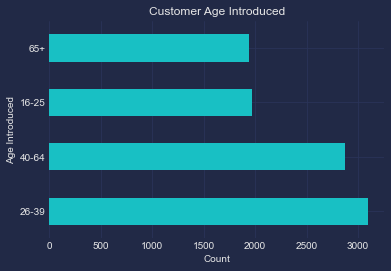

In [256]:
ax = df["AGE"].value_counts().plot(kind="barh", title="Customer Age Introduced")
ax.set_xlabel("Count")
ax.set_ylabel("Age Introduced")

In [269]:
ax = df["ANNUAL_MILEAGE"].plot(kind = "hist", bins = 20, title = "Annual Mileage Distribution")
ax.set_xlabel("Annual Mileage")
ax.set_xlabel

TypeError: no numeric data to plot

## 3 Visualization, Feature Relationships:
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby Comparisons

<Axes: xlabel='VEHICLE_YEAR', ylabel='OUTCOME'>

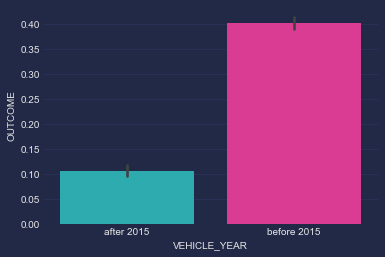

In [257]:
sns.barplot(data=df, x="VEHICLE_YEAR", y="OUTCOME")

<Axes: xlabel='VEHICLE_TYPE', ylabel='count'>

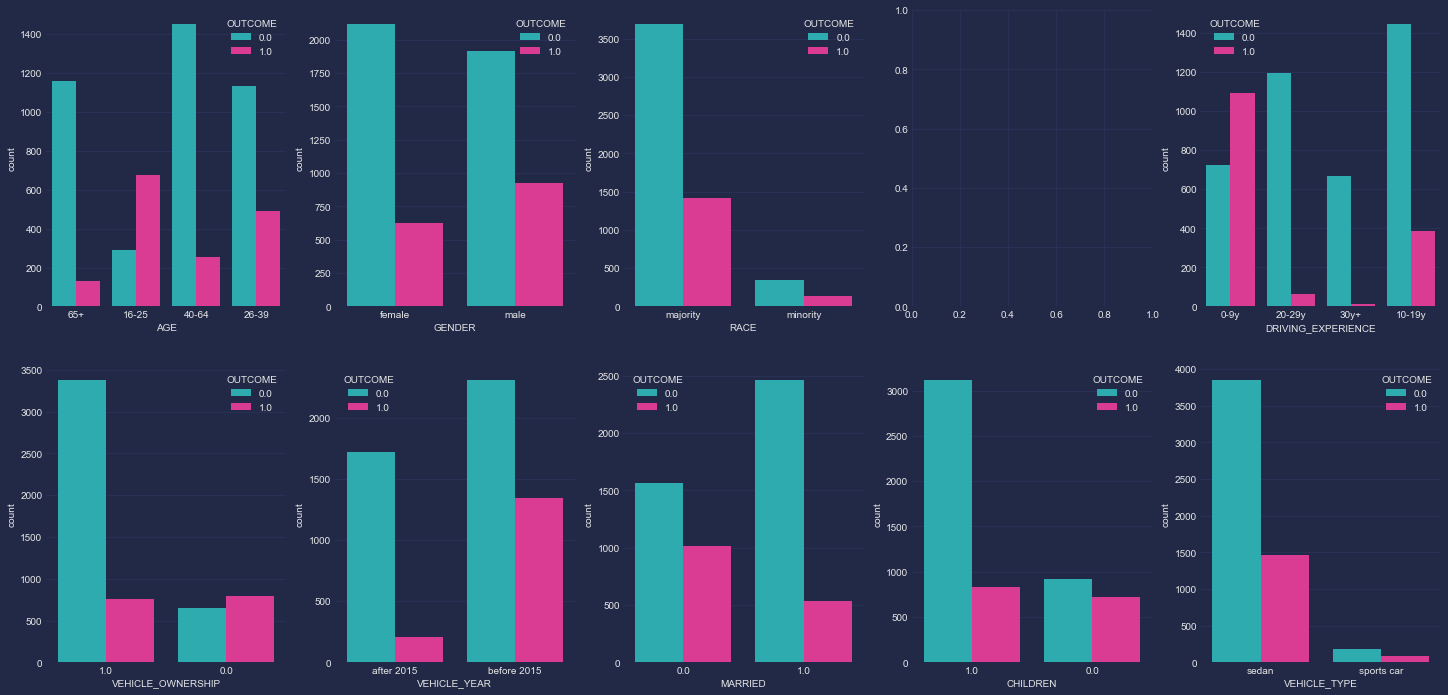

In [271]:
categorical_features = ["AGE", "GENDER", "RACE","REGION", "DRIVING_EXPERIENCE", "VEHICLE_OWNERSHIP", "VEHICLE_YEAR", "MARRIED", "CHILDREN", 
                     "VEHICLE_TYPE"]


fig, axes = plt.subplots(2,5, figsize=(25, 12))


sns.countplot(ax = axes [0][0], data = df, x = "AGE", hue = "OUTCOME")
sns.countplot(ax = axes [0][1], data = df, x = "GENDER", hue = "OUTCOME")
sns.countplot(ax = axes [0][2], data = df, x = "RACE", hue = "OUTCOME")
# sns.countplot(ax = axes [0][3], data = df, x = "REGION", hue = "OUTCOME")
sns.countplot(ax = axes [0][4], data = df, x = "DRIVING_EXPERIENCE", hue = "OUTCOME")
sns.countplot(ax = axes [1][0], data = df, x = "VEHICLE_OWNERSHIP", hue = "OUTCOME")
sns.countplot(ax = axes [1][1], data = df, x = "VEHICLE_YEAR", hue = "OUTCOME")
sns.countplot(ax = axes [1][2], data = df, x = "MARRIED", hue = "OUTCOME")
sns.countplot(ax = axes [1][3], data = df, x = "CHILDREN", hue = "OUTCOME")
sns.countplot(ax = axes [1][4], data = df, x = "VEHICLE_TYPE", hue = "OUTCOME")


<Axes: xlabel='OUTCOME', ylabel='count'>

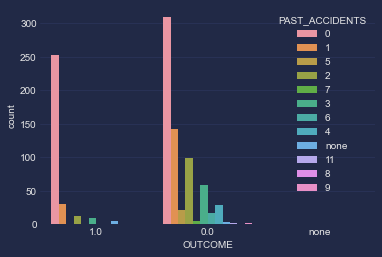

In [278]:
sns.countplot(data = missing_credit_score, x = "OUTCOME", hue = " ")

ValueError: Could not interpret input 'VIOLATION_HISTORY'

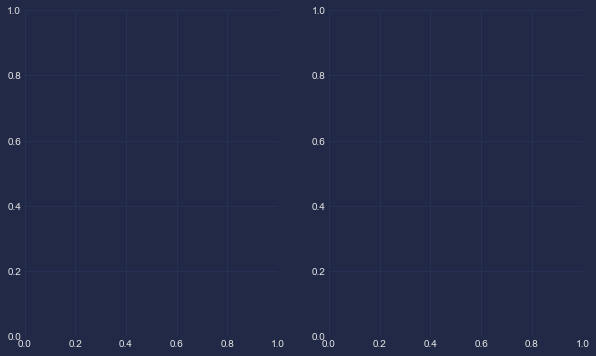

In [277]:
fig, axes = plt.subplots(1,2, figsize=(10, 6))

sns.barplot(ax = axes[0], data = df, x = "OUTCOME", y= "VIOLATION_HISTORY",)
sns.barplot(ax = axes[1], data = df, x = "DRIVING_EXPERIENCE", y= "VIOLATION_HISTORY", hue = "OUTCOME")

<Axes: xlabel='OUTCOME', ylabel='CREDIT_SCORE'>

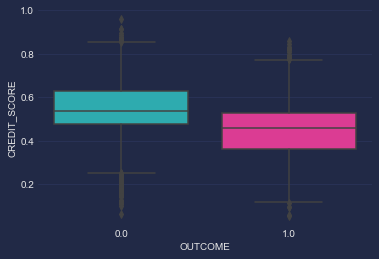

In [261]:
sns.boxplot(x="OUTCOME", y="CREDIT_SCORE", data=df)


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

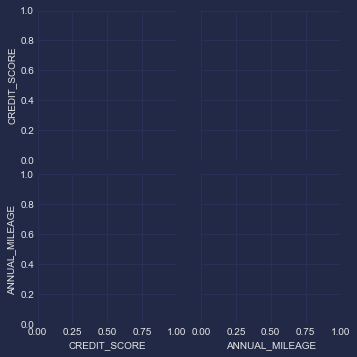

In [245]:
sns.pairplot(df, vars = ["CREDIT_SCORE", "ANNUAL_MILEAGE"], hue = "OUTCOME" )

In [218]:
df_corr = df.dropna().corr()

In [220]:
sns.heatmap(df_corr, annot = True)

ValueError: zero-size array to reduction operation fmin which has no identity